# Tutorials

This tutorial aims to get users familiar with different functions for **GameArg**

### Import Package

In [1]:
from GameArg import *
from IPython.display import display, Image

## Graph Input

To examine the capabilities within GameArg, we can employ the following method to create a random graph with distinct edges, based on a specified number of nodes and edges.<br>
Notes:
- The node count should be at least 2 and no more than 26, as we currently support a maximum of 26 alphabets.
- The number of edges must not surpass the maximum unique edges possible generate

In [2]:
generate_unique_edges(node_count=2, edge_count=2)

## Graph Generation

**Win-Move Graph**

In [3]:
create_plain_graph("files/plain_wm_graph.dlv", "edge", "graphs/wm_graph.dot")

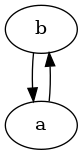

In [4]:
render_dot_to_png("graphs/wm_graph.dot", "graphs/wm_graph.png")
Image("graphs/wm_graph.png")

**Attack_Graph**

In [5]:
create_plain_graph(
    "files/plain_wm_graph.dlv", "edge", "graphs/attack_graph.dot", arg=True
)

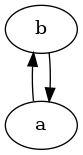

In [6]:
render_dot_to_png("graphs/attack_graph.dot", "graphs/attack_graph.png")
Image("graphs/attack_graph.png")

## Graph Coloring : Well-Founded Semantics

Here we will use the kernel as an example to help you better understand the tool

### Step by Step

#### Get Node Status

To standardize the process of calculation, we use `e` instead of `edge` therefore for wm graph `e(X,Y) :- edge(X,Y).`

In [7]:
%%file files/plain_to_wm.dlv

e(X,Y):- edge(Y,X).

Overwriting files/plain_to_wm.dlv


Later we define the Win-Move Calculation

In [8]:
%%file files/cal_wm.dlv

% Positions
pos(X) :- e(X,_).
pos(X) :- e(_,X).

% Kernel rules
win(X) :- e(Y,X), lost(Y).         % X is in the kernel complement if there is an edge from X into the kernel (to Y)
lost(X) :- pos(X), not win(X).
drawn(X) :- pos(X), not win(X), not lost(X).

Overwriting files/cal_wm.dlv


`-wf` indicates that the dlv will use well-founded semantics

In [9]:
cmd_solve = "dlv files/plain_wm_graph.dlv files/plain_to_wm.dlv files/cal_wm.dlv -wf"

let's run it with DLV, we will get the following output

In [10]:
run_command(cmd_solve)

'DLV [build BEN/Dec 17 2012   gcc 4.6.1]\n\nTrue: {edge(b,a), edge(a,b), e(b,a), e(a,b), pos(b), pos(a)}\nUndefined: {win(b), lost(b), win(a), lost(a), drawn(b), drawn(a)}\n'

however, we need to filterout unnecessary information

In [11]:
wm_nodes_status = get_nodes_status(
    run_command(cmd_solve), node_types=["win", "lost", "drawn"]
)

thus we know the status of each nodes, which we will use for further coloring the graph

In [12]:
wm_nodes_status

{'win': [], 'lost': [], 'drawn': ['b', 'a']}

#### Visualization Schema

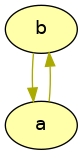

In [13]:
wm_node_color_wfs = {"win": "green", "lost": "red", "drawn": "yellow"}
wm_edge_color_wfs = {
    ("green", "green"): "gray",
    ("green", "yellow"): "gray",
    ("yellow", "green"): "gray",
    ("yellow", "yellow"): "yellow",
    ("green", "red"): "green",
    ("red", "green"): "red",
}
apply_color_schema(
    "graphs/wm_graph.dot",
    "wm",
    wm_nodes_status,
    wm_node_color_wfs,
    wm_edge_color_wfs,
)
Image("graphs/wm_graph_colored.png")

### One Function for All

As we have win_move graph and attack graph, we start to think about maybe we only need to provide the visualization schema and one function can provide us the expected graph

**WM game**

We will unveil the `visualize_wfs` function to illustrate well-founded semantics, requiring the specification of three values along with their color coding. Conversely, for stable models, the `visualize_stb` function requires just two values to be provided.

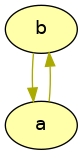

In [14]:
game_node_color_wfs = {"win": "green", "lost": "red", "drawn": "yellow"}
game_edge_color_wfs = {
    ("green", "green"): "gray",
    ("green", "yellow"): "gray",
    ("yellow", "green"): "gray",
    ("yellow", "yellow"): "yellow",
    ("green", "red"): "green",
    ("red", "green"): "red",
}
visualize_wfs(
    "files/plain_wm_graph.dlv",
    "game",
    game_node_color_wfs,
    game_edge_color_wfs
)
Image("graphs/game_graph_colored.png")

Having chosen the color for the edges, you are now able to display either the node label or the edge label.

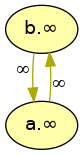

In [15]:
game_node_color_wfs = {"win": "green", "lost": "red", "drawn": "yellow"}
game_edge_color_wfs = {
    ("green", "green"): "gray",
    ("green", "yellow"): "gray",
    ("yellow", "green"): "gray",
    ("yellow", "yellow"): "yellow",
    ("green", "red"): "green",
    ("red", "green"): "red",
}
visualize_wfs(
    "files/plain_wm_graph.dlv",
    "game",
    game_node_color_wfs,
    game_edge_color_wfs,
    show_edge_label=True,
    show_node_label=True,
)
Image("graphs/game_graph_colored.png")

You can also add more layout to the graph

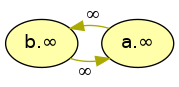

In [16]:
game_node_color_wfs = {"win": "green", "lost": "red", "drawn": "yellow"}
game_edge_color_wfs = {
    ("green", "green"): "gray",
    ("green", "yellow"): "gray",
    ("yellow", "green"): "gray",
    ("yellow", "yellow"): "yellow",
    ("green", "red"): "green",
    ("red", "green"): "red",
}
visualize_wfs(
    "files/plain_wm_graph.dlv",
    "game",
    game_node_color_wfs,
    game_edge_color_wfs,
    show_edge_label=True,
    show_node_label=True,
    rank=True
)
Image("graphs/game_graph_colored.png")

**Argumentation**

From the game graph, by adding `arg=True`, you can effortlessly obtain the argumentation framework version.

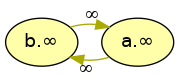

In [17]:
arg_node_color_wfs = {
    "accepted": "blue",
    "defeated": "orange",
    "undefined": "yellow",
}
arg_edge_color_wfs = {
    ("blue", "blue"): "gray",
    ("blue", "yellow"): "gray",
    ("yellow", "blue"): "gray",
    ("yellow", "yellow"): "yellow",
    ("blue", "orange"): "orange",
    ("orange", "blue"): "blue",
}
visualize_wfs(
    "files/plain_wm_graph.dlv",
    "arg",
    arg_node_color_wfs,
    arg_edge_color_wfs,
    arg=True,
    show_edge_label=True,
    show_node_label=True,
    rank=True
)
Image("graphs/arg_graph_colored.png")

**Kernel and Graph Decomposition**

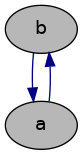

In [18]:
kernel_node_color_wfs = {"c": "white", "k": "black", "pk": "gray"}
kernel_edge_color_wfs = {
    ("white", "white"): "gray",
    ("white", "gray"): "gray",
    ("gray", "white"): "gray",
    ("gray", "gray"): "dark_blue",
    ("white", "black"): "dark_gray",
    ("black", "white"): "black",
}
visualize_wfs(
    "files/plain_wm_graph.dlv",
    "kernel",
    kernel_node_color_wfs,
    kernel_edge_color_wfs
)
Image("graphs/kernel_graph_colored.png")

### Graph Coloring: Stable Models

#### Get Node Status

similar to the WFS, but we need to remove the solve part `-wf`

In [19]:
cmd_solve = 'dlv files/plain_wm_graph.dlv files/plain_to_kernel.dlv files/cal_kernel.dlv -filter="k"'

let's run the command

In [20]:
print(run_command(cmd_solve))

DLV [build BEN/Dec 17 2012   gcc 4.6.1]

{k(a)}

{k(b)}



After the command, we can get the possible worlds

#### One Function for All

Similar to the WFS, we also want to generate all the stable models with defined visualization schema

**Stable Models for Kernel Graph**

In [21]:
kernel_node_color_stb = {"c": "white", "k": "black"}
kernel_edge_color_stb = {
    ("white", "white"): "gray",
    ("white", "gray"): "gray",
    ("gray", "white"): "gray",
    ("gray", "gray"): "dark_yellow",
    ("white", "black"): "dark_gray",
    ("black", "white"): "black",
}
visualize_stb(
    "files/plain_wm_graph.dlv",
    "kernel",
    kernel_node_color_stb,
    kernel_edge_color_stb,
    show_node_label=True,
    rank=True
)

**Stable Models for WM Graph**

In [22]:
game_node_color_stb = {"win": "green", "lost": "red"}
game_edge_color_stb = {
    ("green", "green"): "gray",
    ("green", "yellow"): "gray",
    ("yellow", "green"): "gray",
    ("yellow", "yellow"): "yellow",
    ("green", "red"): "green",
    ("red", "green"): "red",
}
visualize_stb(
    "files/plain_wm_graph.dlv",
    "game",
    game_node_color_stb,
    game_edge_color_stb,
    show_node_label=True,
    rank=True
)

**Stable Models for Attack Graph**

In [23]:
arg_node_color_stb = {
    "accepted": "blue",
    "defeated": "orange",
    "undefined": "yellow",
}
arg_edge_color_stb = {
    ("blue", "blue"): "gray",
    ("blue", "yellow"): "gray",
    ("yellow", "blue"): "gray",
    ("yellow", "yellow"): "yellow",
    ("blue", "orange"): "orange",
    ("orange", "blue"): "blue",
}
visualize_stb(
    "files/plain_wm_graph.dlv",
    "arg",
    arg_node_color_stb,
    arg_edge_color_stb,
    arg=True,
    show_node_label=True,
    rank=True
)